In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<h1>BUILDING A IMAGE CLASSIFICIER

In [2]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:

X_train_full.shape

(60000, 28, 28)

In [5]:

X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

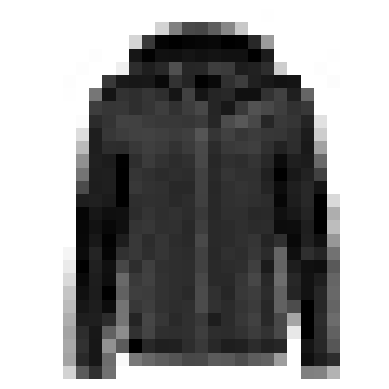

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:

y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:

class_names[y_train[0]]

'Coat'

In [11]:

X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

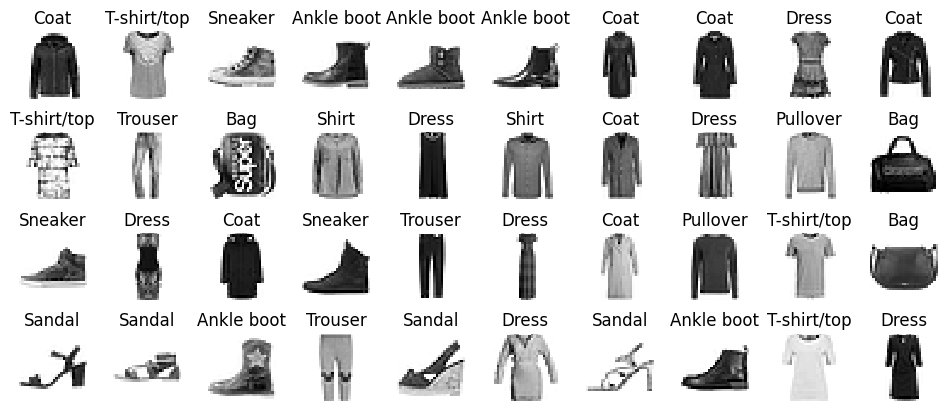

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<h1>Construction du Model

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
keras.backend.clear_session()
np.random.seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:

model.layers

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:

hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:

model.get_layer(hidden1.name) is hidden1

True

In [21]:

weights, biases = hidden1.get_weights()

In [22]:

weights

array([[-0.01579927,  0.03716158, -0.07109036, ...,  0.04049997,
         0.07345238,  0.06653959],
       [ 0.02622949, -0.07207124, -0.0706128 , ..., -0.05750066,
        -0.06691389,  0.00226262],
       [-0.03781824,  0.07326518, -0.00594669, ...,  0.04602265,
         0.05299126,  0.05972117],
       ...,
       [-0.03414531, -0.0725242 ,  0.03225026, ...,  0.02332941,
        -0.01491395,  0.07148308],
       [-0.0118996 ,  0.07122992,  0.02060507, ..., -0.04308693,
        -0.07274801, -0.07230749],
       [ 0.04459275, -0.02183682, -0.01516389, ..., -0.0104828 ,
        -0.0239508 , -0.01333369]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:

biases.shape

(300,)

<h1> Compilation du fichier

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

<h1> Entrainnement du Model

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7127 - accuracy: 0.7627 - val_loss: 0.5047 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4877 - accuracy: 0.8294 - val_loss: 0.4710 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4437 - accuracy: 0.8444 - val_loss: 0.4075 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4156 - accuracy: 0.8549 - val_loss: 0.4068 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3950 - accuracy: 0.8612 - val_loss: 0.3890 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3804 - accuracy: 0.8669 - val_loss: 0.3809 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3663 - accuracy: 0.8702 - val_loss: 0.3741 - val_accurac

In [30]:

history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h1> Faire un learning Curve 

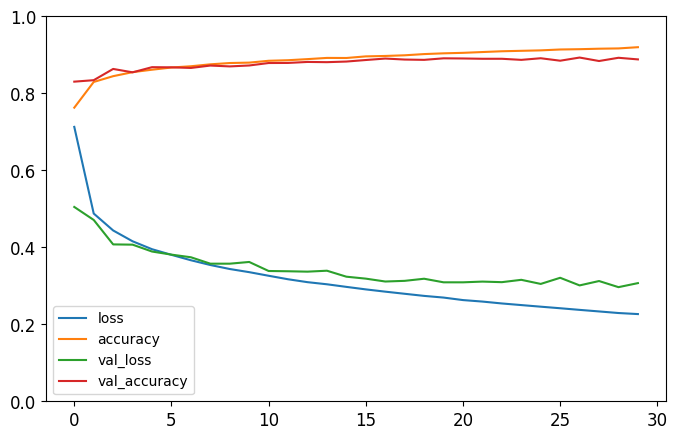

In [45]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3360 - accuracy: 0.8810


[0.33597883582115173, 0.8809999823570251]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 114ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 96ms/step


array([[1.2221857e-06, 3.2872322e-07, 1.5748992e-06, 6.5440879e-08,
        9.4602831e-07, 2.3209262e-03, 3.5508233e-06, 9.4042569e-03,
        9.5290001e-05, 9.8817176e-01],
       [4.0436155e-04, 2.0655847e-08, 9.8431927e-01, 2.5627113e-08,
        1.2853440e-02, 1.6692243e-11, 2.4226217e-03, 1.1356237e-10,
        3.3257970e-07, 2.3992447e-11],
       [3.2609091e-06, 9.9999654e-01, 1.2245079e-09, 1.8159684e-08,
        2.2677176e-07, 1.9597114e-10, 1.2660291e-09, 3.5426987e-12,
        1.3711712e-10, 5.9792617e-13]], dtype=float32)

In [42]:
[np.argmax(model.predict(X_new))]

1/1 [==============================] - 0s 24ms/step


[21]

In [43]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

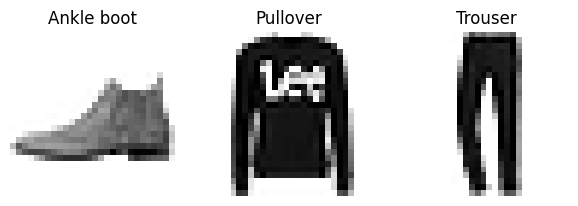

In [44]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<h1> Faire le learning Curve en utilisant un autre optimizer

In [63]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])





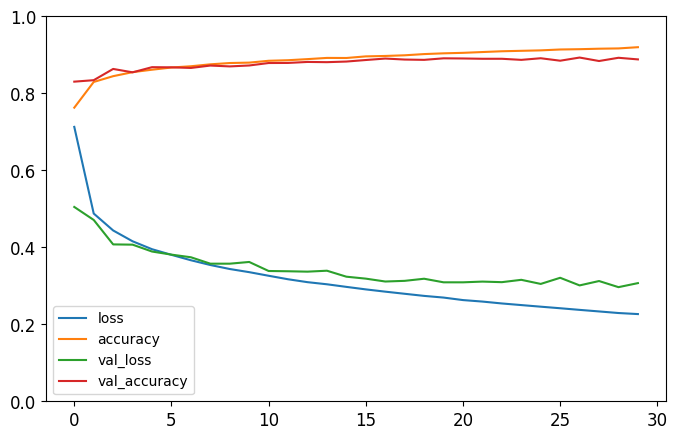

In [64]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

<h1> Utliser un autre Batch et en utilisant different epoch

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [75]:
input_shape = (28, 28, 1) 
num_classes = 10



In [77]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])


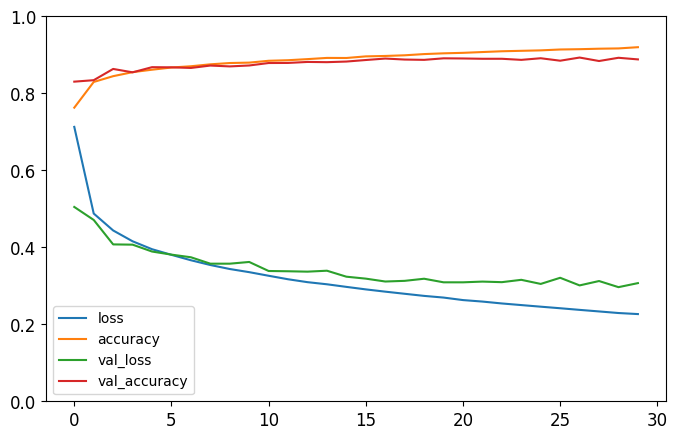

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()